In [4]:
#%pip install imageio == 2.4.1
#%pip install gym
#%pip install pygame
#%pip install opencv-python
#%pip install matplotlib

In [5]:
# Setup Environment
import sys
sys.path.append("../")
sys.path.append("../source")

import gym
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.tree_search import TreeSearchAgent
from source.utils import *


step: 1000, epsilon: 0.7247796636777333, total reward: 4.0, avarge success rate: 0.004, avarage reward per step: 9.327509327509326e-05
step: 2000, epsilon: 0.5253055608808082, total reward: 26.0, avarge success rate: 0.022, avarage reward per step: 0.0003697904955530856
step: 3000, epsilon: 0.3807307877432351, total reward: 62.0, avarge success rate: 0.036, avarage reward per step: 0.0007355242506713679
step: 4000, epsilon: 0.2759459322923004, total reward: 167.0, avarge success rate: 0.104, avarage reward per step: 0.0018791205557058207
step: 5000, epsilon: 0.20000000000005203, total reward: 331.0, avarge success rate: 0.164, avarage reward per step: 0.0028640353794708775
step: 6000, epsilon: 0.14495593273558435, total reward: 595.0, avarge success rate: 0.264, avarage reward per step: 0.004920866427113447
step: 7000, epsilon: 0.10506111217618895, total reward: 977.0, avarge success rate: 0.382, avarage reward per step: 0.006649602692567879
step: 8000, epsilon: 0.07614615754866683, to

100%|██████████| 100/100 [00:01<00:00, 53.50it/s]


Success rate = 0.66


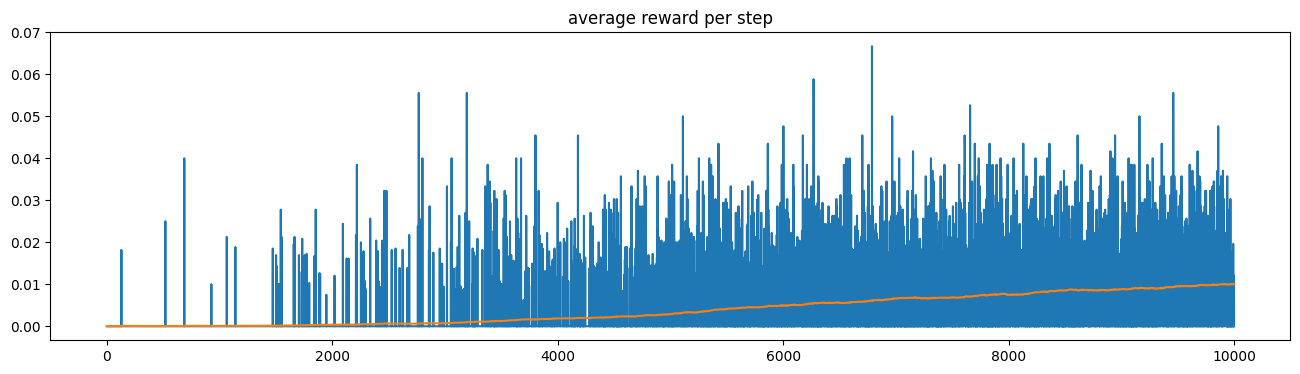

In [6]:
# Policy Eval
# Params
max_episode = 10000
video_path = "../video/dyna_q.mp4"
random_seed = 101

# Initialize
history = []
total_reward = 0
report_interval = max(max_episode // 10, 1)
# set random seeds
rng = np.random.default_rng(random_seed)
np.random.seed(random_seed)
# epsilon decay
epsilon_schedule = create_decay_schedule(max_episode)
lr_schedule = create_decay_schedule(max_episode)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8",
               is_slippery=True, render_mode='rgb_array')
env.np_random = rng

# Create Agent
agent = TreeSearchAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.95,
    epsilon=0.2,
    learning_rate=0.1,
    agent_type='q_learning',
    planning_steps=2
)


# Start Learning
for i in range(max_episode):
    reward, steps = agent.play_episode(env, epsilon=epsilon_schedule[i])
    history.append(reward / steps)
    total_reward += reward
    if i % report_interval == 0 and i != 0:
        print(
            f"step: {i}, epsilon: {agent._epsilon}, total reward: {total_reward}, avarge success rate: {np.sum([x > 0 for x in history[-report_interval:-1]])/report_interval}, avarage reward per step: {np.mean(history[-report_interval:-1])}")
print(f"\nrewarding episodes: {total_reward}")
# For off policy learning only: get greedy policy (no exploration)
agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q)
agent._epsilon = 0
# Run Eval
success_rate = estimate_success_rate(agent, env, 100)
print(f"Success rate = {success_rate}")
# play last episode with video recording
#agent.play_episode(env, learning=False, video_path=video_path)

plot_history(history)
# html=render_mp4(video_path)
# HTML(html)


In [7]:
show_state_action_values(agent, 'frozen_lake_4x4')

ValueError: cannot reshape array of size 256 into shape (4,4,4)

<Figure size 1600x400 with 0 Axes>